<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [4]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 130.0 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [12]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [13]:
# Count missing values in specific columns
df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

In [14]:
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
df['JobSat'].fillna(df['JobSat'].mode()[0], inplace=True)
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
#Fill with the mode (most frequent value):

/tmp/ipykernel_300/1297730518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)
/tmp/ipykernel_300/1297730518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [15]:
df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
#Verify That Missing Values Are Handled

Employment    0
JobSat        0
RemoteWork    0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [16]:
def to_number(x):
    if pd.isna(x):
        return None
    if "Less than" in x:
        return 1
    if "More than" in x:
        return 21
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(to_number)
#Convert YearsCodePro to numbers
#We’ll convert text like “Less than 1 year” → 1, “More than 20 years” → 21.

In [18]:
df['ExpRange'] = pd.cut(
    df['YearsCodePro_num'],
    bins=[0, 5, 10, 20, 100],
    labels=['0-5', '5-10', '10-20', '>20']
)
#Create Experience Groups

In [19]:
median_by_exp = df.groupby('ExpRange')['JobSat'].median()

print(median_by_exp)
#Calculate Median for Each Group

ExpRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_300/2754443802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_exp = df.groupby('ExpRange')['JobSat'].median()


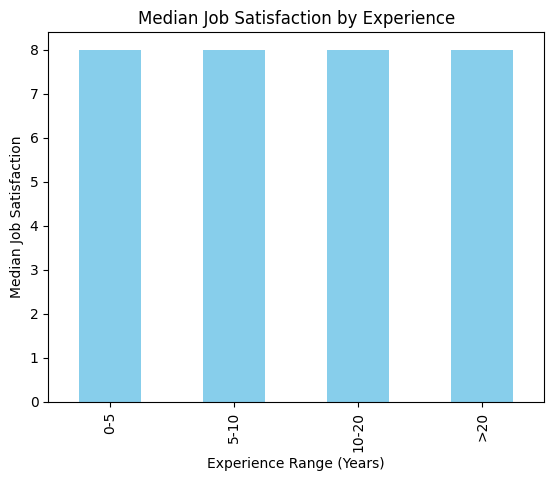

In [20]:
# Simple mapping — adjust if your survey uses different wording
median_by_exp.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Experience')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


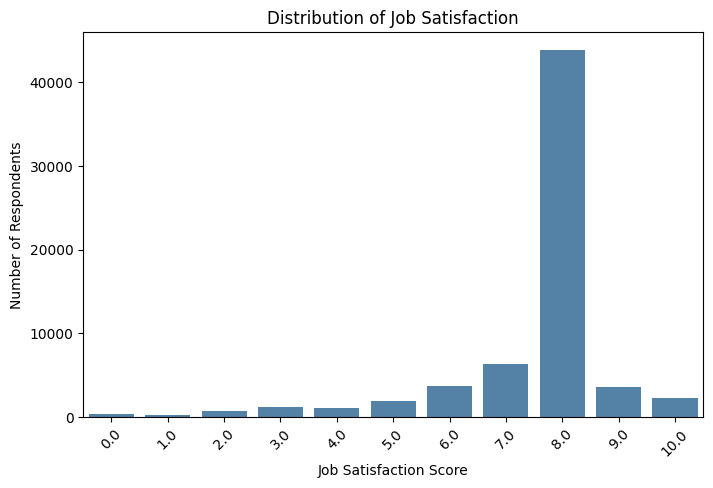

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic count plot
plt.figure(figsize=(8,5))
sns.countplot(x='JobSat', data=df, color='steelblue')

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [22]:
# Drop rows with missing RemoteWork or Employment
df_remote = df.dropna(subset=['RemoteWork', 'Employment']).copy()

# Preview unique values
print(df_remote['RemoteWork'].unique())
print(df_remote['Employment'].unique())


['Remote' 'Hybrid (some remote, some in-person)' 'In-person']
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, 

/tmp/ipykernel_300/850152147.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df_remote, palette='pastel')


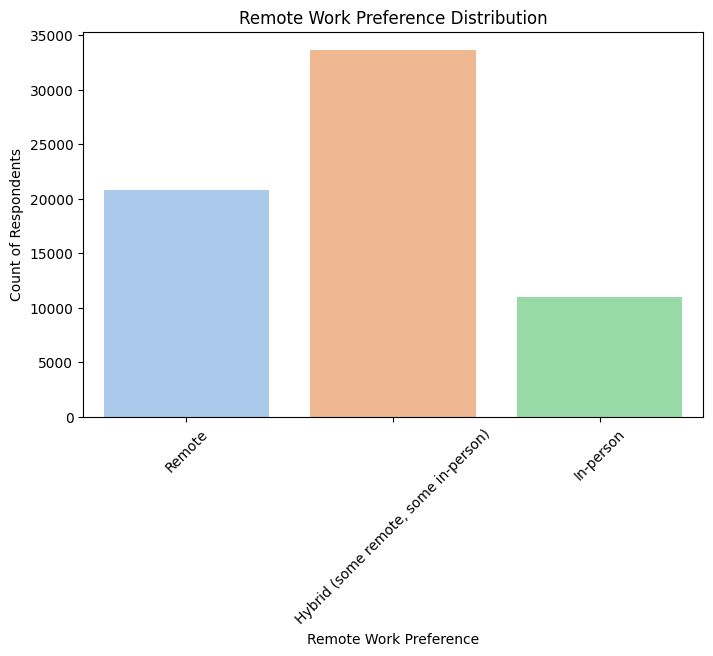

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='RemoteWork', data=df_remote, palette='pastel')
plt.title('Remote Work Preference Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()

#Count Plot: Overall Remote Work Distribution
#This shows how many respondents chose each remote work preference

In [24]:
remote_by_emp = pd.crosstab(df_remote['Employment'], df_remote['RemoteWork'])
remote_by_emp
#A cross-tab (cross-tabulation) is a table that shows the relationship between two categorical variables by counting how often combinations of categories occur.

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",17296,8552,13193
"Employed, full-time;Employed, part-time",85,32,95
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0
...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",4,1,2
"Student, full-time;Student, part-time;Retired",2,0,0
"Student, part-time",494,0,0


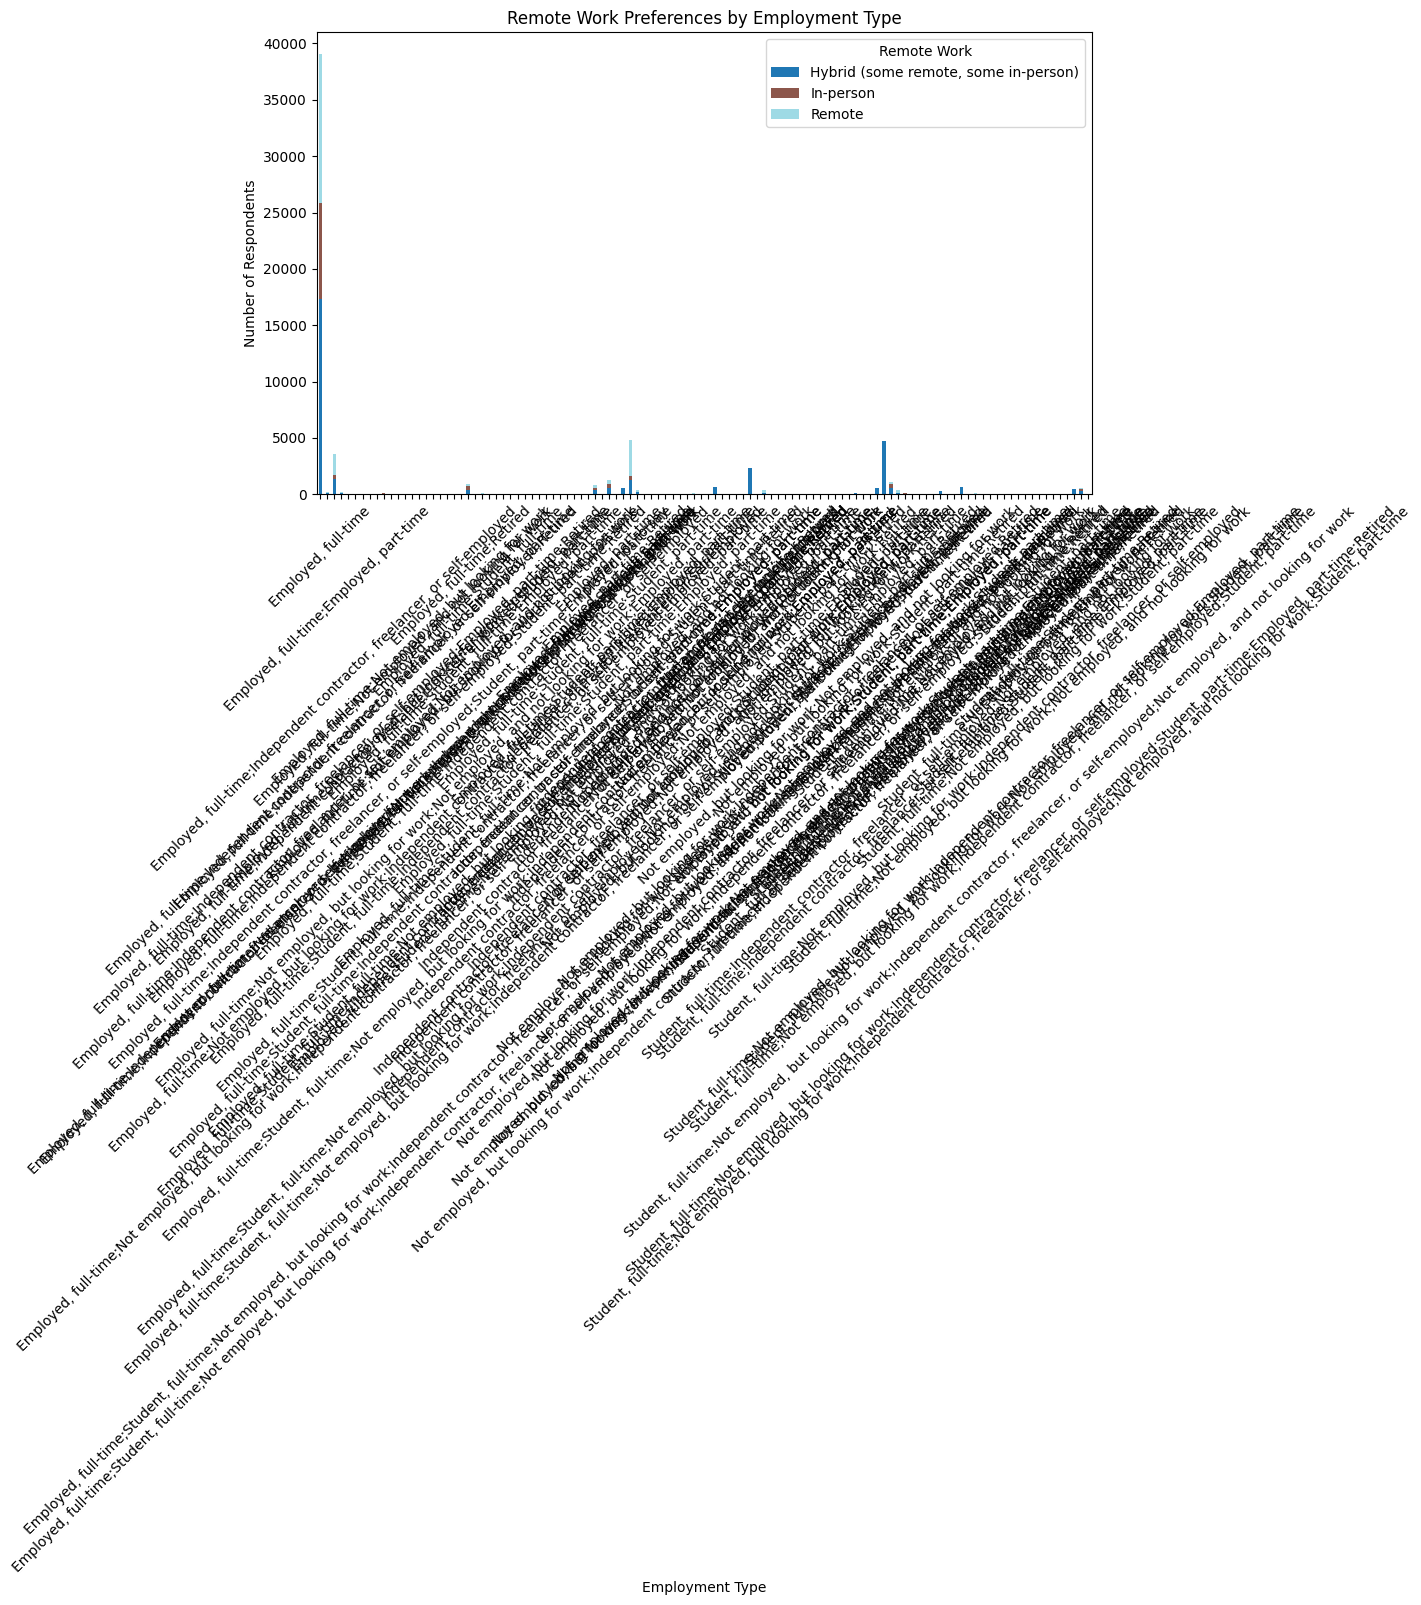

In [45]:
remote_by_emp.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.legend(title='Remote Work')
plt.xticks(rotation=45)
plt.show()
#Plot a stacked bar chart

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [25]:
# Split languages into lists
df['LangList'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode so each row has one language
df_lang = df.explode('LangList')

# Clean up whitespace
df_lang['LangList'] = df_lang['LangList'].str.strip()


In [26]:
countries = ['India', 'Canada']
df_region = df_lang[df_lang['Country'].isin(countries)]
#Filter by Region or Country

In [27]:
lang_counts = df_region.groupby(['Country', 'LangList']).size().reset_index(name='Count')
#Count Most Popular Languages by Region

In [28]:
top_langs = lang_counts.sort_values(['Country','Count'], ascending=[True, False]).groupby('Country').head(10)
print(top_langs)


   Country                 LangList  Count
22  Canada               JavaScript   1296
36  Canada                   Python   1118
19  Canada                 HTML/CSS   1097
40  Canada                      SQL   1073
3   Canada  Bash/Shell (all shells)    798
44  Canada               TypeScript    796
5   Canada                       C#    603
21  Canada                     Java    571
6   Canada                      C++    488
4   Canada                        C    415
71   India               JavaScript   2730
68   India                 HTML/CSS   2322
85   India                   Python   2128
89   India                      SQL   1986
70   India                     Java   1549
93   India               TypeScript   1405
55   India                      C++   1127
53   India                        C   1084
52   India  Bash/Shell (all shells)    759
81   India                      PHP    722


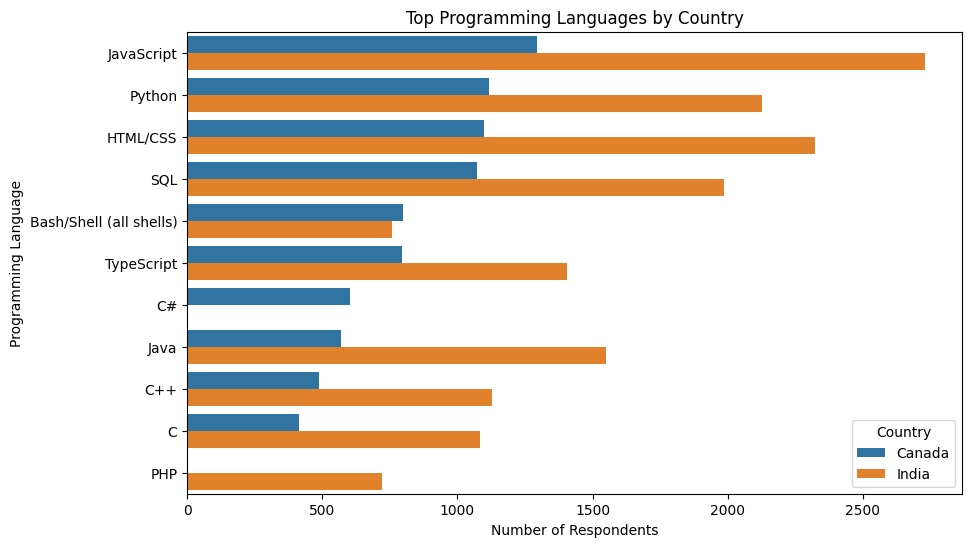

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Count',
    y='LangList',
    hue='Country',
    data=top_langs,
    dodge=True
)
plt.title('Top Programming Languages by Country')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [30]:
df_scatter = df.dropna(subset=['YearsCodePro_num', 'JobSatPoints_1'])


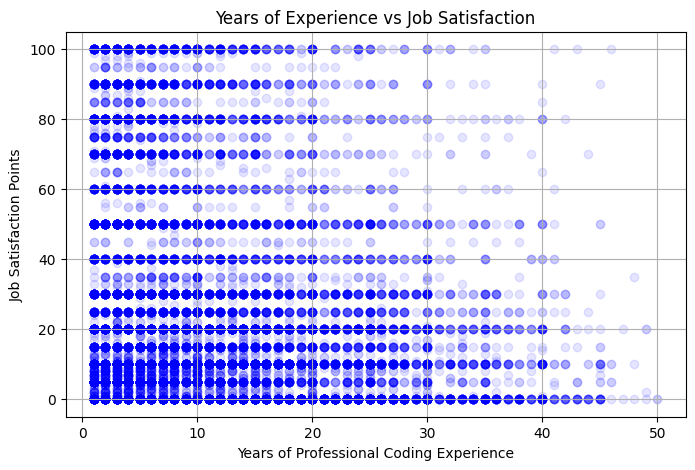

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(
    df_scatter['YearsCodePro_num'],
    df_scatter['JobSatPoints_1'],
    alpha=0.1,
    color='blue'
)

plt.title('Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [33]:
df_edu_emp = df.dropna(subset=['EdLevel', 'Employment'])
#First drop rows where either EdLevel or Employment is missing

In [34]:
edu_emp_ct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'])
print(edu_emp_ct)
#Cross-Tabulate
#Create a table showing counts of each combination of education and employment:

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_300/343792628.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


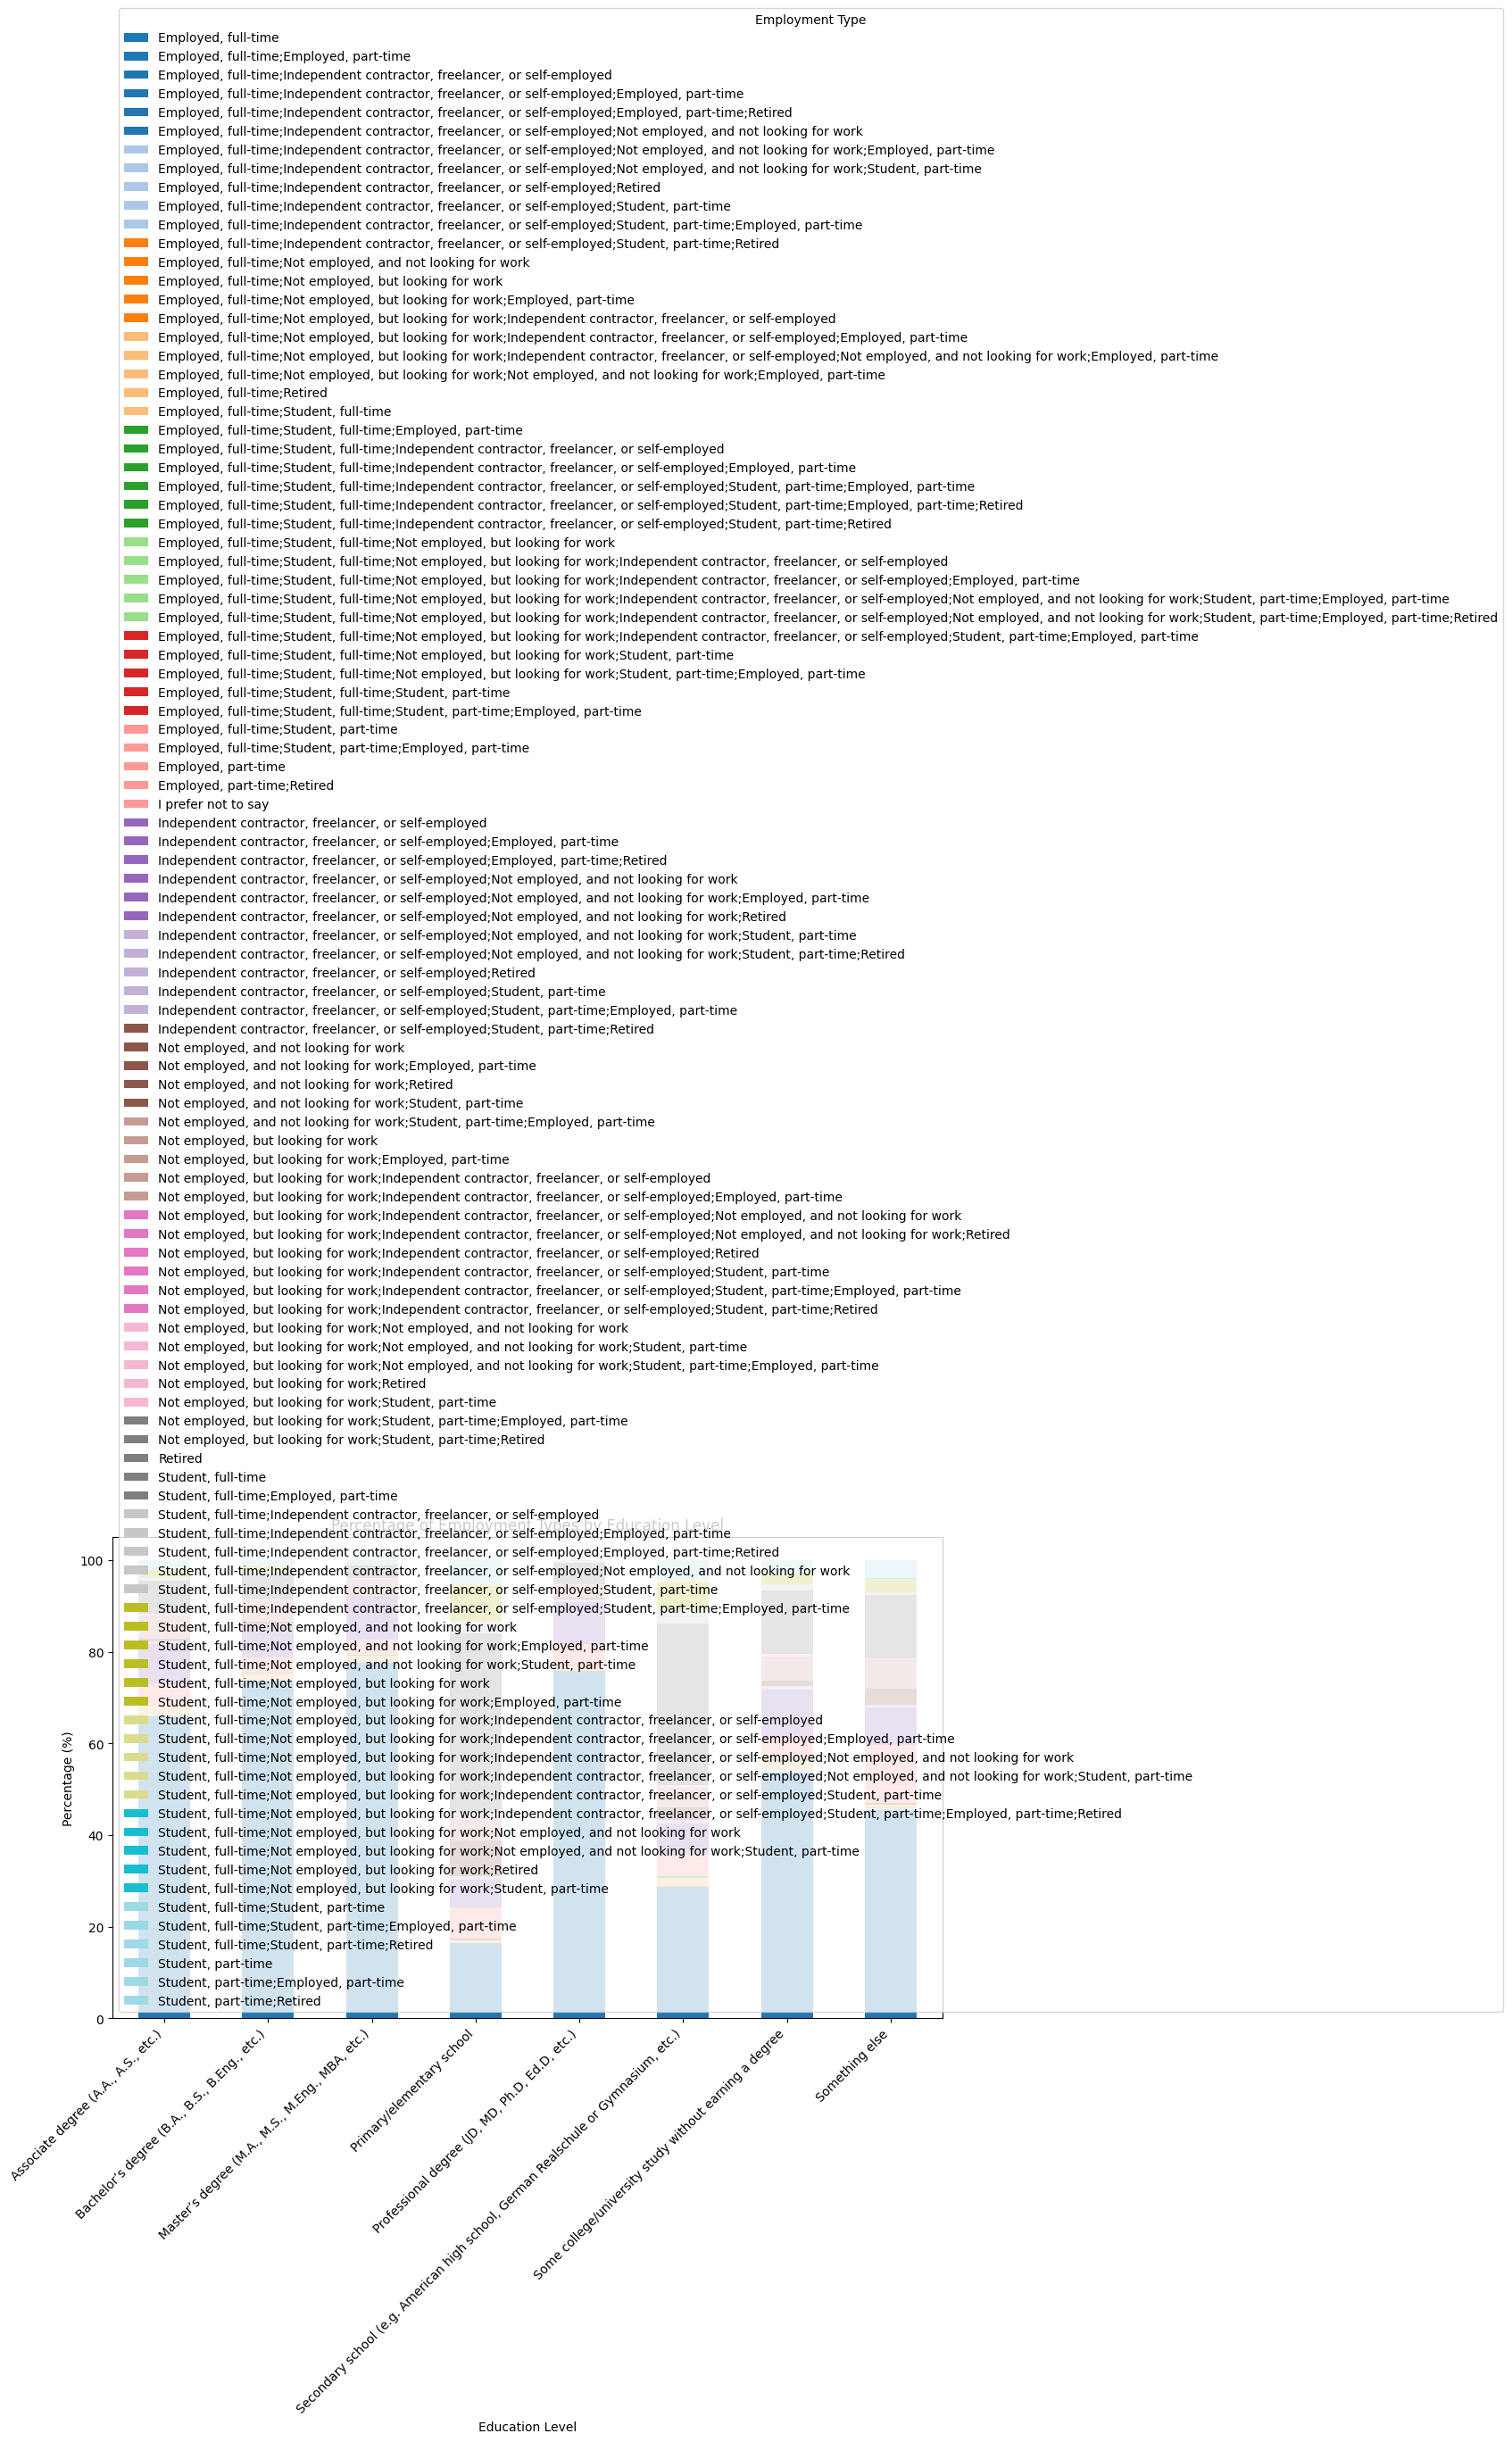

In [38]:
edu_emp_pct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'], normalize='index') * 100

edu_emp_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)

plt.title('Percentage of Employment Types by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [39]:
# After all cleaning and analysis
df.to_csv('stack_overflow_survey_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
